In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [19]:
# Load the dataset
data = pd.read_csv('C:/Users/shravanitipe/mapython/zomato.csv')
print(data.head())

         Date        Open        High         Low       Close   Adj Close  \
0  2021-07-23  116.000000  138.899994  115.000000  126.000000  126.000000   
1  2021-07-26  126.349998  143.750000  125.300003  140.649994  140.649994   
2  2021-07-27  141.699997  147.800003  127.750000  132.899994  132.899994   
3  2021-07-28  131.000000  135.000000  123.550003  131.199997  131.199997   
4  2021-07-29  134.949997  144.000000  132.199997  141.550003  141.550003   

      Volume  
0  694895290  
1  249723854  
2  240341900  
3  159793731  
4  117973089  


In [20]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [21]:

# Use the 'Close' price for prediction
data = data[['Close']]

In [22]:
# Create a column for the next day's price
data['Prediction'] = data['Close'].shift(-1)

In [23]:
print(data)

                 Close  Prediction
Date                              
2021-07-23  126.000000  140.649994
2021-07-26  140.649994  132.899994
2021-07-27  132.899994  131.199997
2021-07-28  131.199997  141.550003
2021-07-29  141.550003  133.500000
...                ...         ...
2024-02-01  140.550003  143.800003
2024-02-02  143.800003  140.250000
2024-02-05  140.250000  139.949997
2024-02-06  139.949997  140.399994
2024-02-07  140.399994         NaN

[631 rows x 2 columns]


In [24]:
# Prepare the feature and target datasets
X = np.array(data.drop(['Prediction'], axis=1))[:-1]
y = np.array(data['Prediction'])[:-1]

In [25]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [27]:
# Make predictions
predictions = model.predict(X_test)


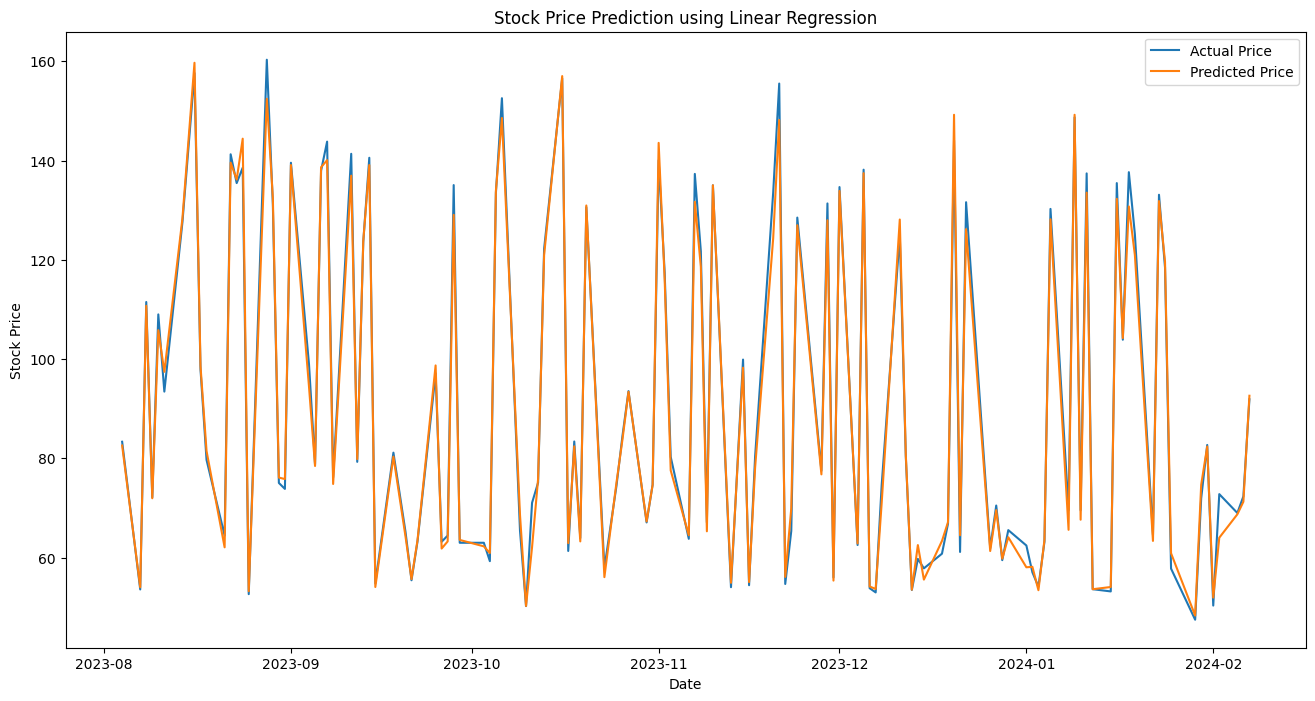

In [28]:
# Plot the results
plt.figure(figsize=(16, 8))
plt.title('Stock Price Prediction using Linear Regression')
plt.plot(data.index[-len(y_test):], y_test, label='Actual Price')
plt.plot(data.index[-len(y_test):], predictions, label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()